In [4]:
!pip install tweet-preprocessor
!pip install transformers

     |████████████████████████████████| 2.1MB 7.5MB/s 
     |████████████████████████████████| 3.3MB 36.8MB/s 
     |████████████████████████████████| 901kB 48.2MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
from datetime import datetime, date, timedelta
import warnings

import preprocessor as p

#import nltk
#nltk.download('vader_lexicon')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

#from textblob import TextBlob

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/vaccination_all_tweets.csv')
df.sort_values(by='date').reset_index(drop = True)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False
1,1337728701820268544,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 11:59:10,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False
2,1337732077278662657,mystic,NaN,I believe in the goodness of humanity.,2020-05-20 10:57:00,14,162,1341,False,2020-12-12 12:12:35,#CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...,"['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...",Twitter for iPhone,0,1,False
3,1337732996380696578,KHuntson,USA🇺🇸,"RN, health educator, writer, researcher, wife,...",2014-01-31 01:25:24,2035,1672,6734,False,2020-12-12 12:16:14,FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...,"['PfizerBioNTech', 'CovidVaccine']",Twitter Web App,0,0,False
4,1337733048914358272,"Party politics isn't working for anyone, anywhere","Wales, United Kingdom",No lie to another is respectful; no lie to you...,2016-08-03 20:11:00,761,504,33675,False,2020-12-12 12:16:27,@mirekR9 @sputnikvaccine @AstraZeneca it's the...,['PfizerBioNTech'],Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69713,1385236441777807363,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:17:58,@fordnation Canada politicizing #COVID19. Labo...,"['COVID19', 'SputnikV', 'Argentina']",Twitter for iPhone,0,0,False
69714,1385236473998450694,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:18:06,@CP24 Canada politicizing #COVID19. Laboratori...,"['COVID19', 'SputnikV', 'Argentina']",Twitter for iPhone,0,0,False
69715,1385236820854812676,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:19:29,EMBARRASSING Ontario is reporting 3682 cases ...,"['COVID19', 'vaccine']",Twitter for iPhone,0,0,False
69716,1385236855092822016,Workout Solutions,"Toronto, Canada and Worldwide",George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,236,2182,False,2021-04-22 14:19:37,@fordnation EMBARRASSING Ontario is reporting ...,['COVID19'],Twitter for iPhone,0,0,False


In [8]:
df1 = df.drop_duplicates('text')
df1.shape

(69621, 16)


In [9]:
df1.isnull().sum()

id                      0
user_name               0
user_location       15789
user_description     4858
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            14814
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [10]:
df1 = df1.drop('user_description', axis = 1)

In [11]:
df1['source']=df1['source'].fillna(df1['source'].mode()[0])
df1.isnull().sum()

id                     0
user_name              0
user_location      15789
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags           14814
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [12]:
cols = ['user_location', 'hashtags']
df1[cols]=df1[cols].fillna('None')

In [13]:
df1.isnull().sum()

id                 0
user_name          0
user_location      0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
hashtags           0
source             0
retweets           0
favorites          0
is_retweet         0
dtype: int64

In [14]:
tweets_df = df1.copy()
tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: p.clean(x))

In [15]:
tweets_df.head(10)

,id,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_cleaned
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same folks said daikon paste could treat a cyt...
1,1338158543359250433,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,None,Twitter Web App,1,1,False,While the world has been on the wrong side of ...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Russian vaccine is created to last -4 years
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",None,Twitter Web App,446,2129,False,"Facts are immutable, Senator, even when you're..."
4,1337854064604966912,Citizen News Channel,None,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine
5,1337852648389832708,Dee,"Birmingham, England",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,None,Twitter for iPhone,0,0,False,Does anyone have any useful advice/guidance fo...
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,it is a bit sad to claim the fame for success ...
7,1337850832256176136,Dr.Krutika Kuppalli,None,2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,There have not been many bright days in but he...
8,1337850023531347969,Erin Despas,None,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,Covid vaccine; You getting it?
9,1337842295857623042,Ch.Amjad Ali,Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"States will start getting Monday, says"


In [16]:
punct =['%','/',':','\\','&amp;','&',';']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

tweets_df['text_cleaned'] = tweets_df['text_cleaned'].apply(lambda x: remove_punctuations(x))

# VADER



In [17]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.2MB/s 


In [18]:
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
#vader_df = pd.read_csv('/content/drive/MyDrive/vaccination_all_tweets.csv')
vader_df = tweets_df
vader_df.head(10)

,id,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_cleaned
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same folks said daikon paste could treat a cyt...
1,1338158543359250433,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,None,Twitter Web App,1,1,False,While the world has been on the wrong side of ...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Russian vaccine is created to last -4 years
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",None,Twitter Web App,446,2129,False,"Facts are immutable, Senator, even when you're..."
4,1337854064604966912,Citizen News Channel,None,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine
5,1337852648389832708,Dee,"Birmingham, England",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,None,Twitter for iPhone,0,0,False,Does anyone have any useful adviceguidance for...
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,it is a bit sad to claim the fame for success ...
7,1337850832256176136,Dr.Krutika Kuppalli,None,2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,There have not been many bright days in but he...
8,1337850023531347969,Erin Despas,None,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,Covid vaccine You getting it?
9,1337842295857623042,Ch.Amjad Ali,Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"States will start getting Monday, says"


In [21]:
vader_df.sort_values(by='date').reset_index(drop = True)
vader_df = vader_df.drop_duplicates('text')
vader_df = tweets_df.drop(columns = ['is_retweet','favorites','retweets','source','hashtags','date','user_verified','user_favourites','user_friends','user_followers','user_created','user_location','user_name','id','text_cleaned'])
vader_df.isnull().sum()

text    0
dtype: int64

In [22]:
vader_df.isna().sum()

text    0
dtype: int64

In [23]:
vader_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [24]:
vader_data = vader_df.reset_index(drop=True)

In [25]:
result = []

for i in range(vader_data['text'].shape[0]):
  compound = analyzer.polarity_scores(vader_data['text'][i])["compound"]
  pos = analyzer.polarity_scores(vader_data['text'][i])["pos"]
  neu = analyzer.polarity_scores(vader_data['text'][i])["neu"]
  neg = analyzer.polarity_scores(vader_data['text'][i])["neg"]
  result.append({"Compound": compound,
                 "Positive": pos,
                 "Negative": neg,
                 "Neutral": neu
                })

In [26]:
result = pd.DataFrame.from_dict(result)

In [27]:
vader_data = vader_data.join(result)
vader_data.head()

,text,Compound,Positive,Negative,Neutral
0,Same folks said daikon paste could treat a cyt...,0.4019,0.197,0.000,0.803
1,While the world has been on the wrong side of ...,-0.1027,0.109,0.125,0.766
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.2500,0.125,0.000,0.875
3,"Facts are immutable, Senator, even when you're...",0.0000,0.000,0.000,1.000
4,Explain to me again why we need a vaccine @Bor...,0.0000,0.000,0.000,1.000


In [115]:
def val_to_text(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  elif polarity > 0:
    return 'Positive'

In [116]:
def text_to_val(polarity):
  if polarity == 'Positive':
    return 2
  elif polarity == 'Neutral':
    return 1
  elif polarity == 'Negative':
    return 0

In [32]:
vader_data['target'] = vader_data['Analysis'].apply(text_to_val)
vader_data.head()

,text,Compound,Positive,Negative,Neutral,Analysis,target
0,Same folks said daikon paste could treat a cyt...,0.4019,0.197,0.000,0.803,Positive,2
1,While the world has been on the wrong side of ...,-0.1027,0.109,0.125,0.766,Negative,0
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.2500,0.125,0.000,0.875,Positive,2
3,"Facts are immutable, Senator, even when you're...",0.0000,0.000,0.000,1.000,Neutral,1
4,Explain to me again why we need a vaccine @Bor...,0.0000,0.000,0.000,1.000,Neutral,1


Neutral     28512
Positive    27656
Negative    13453
Name: Analysis, dtype: int64


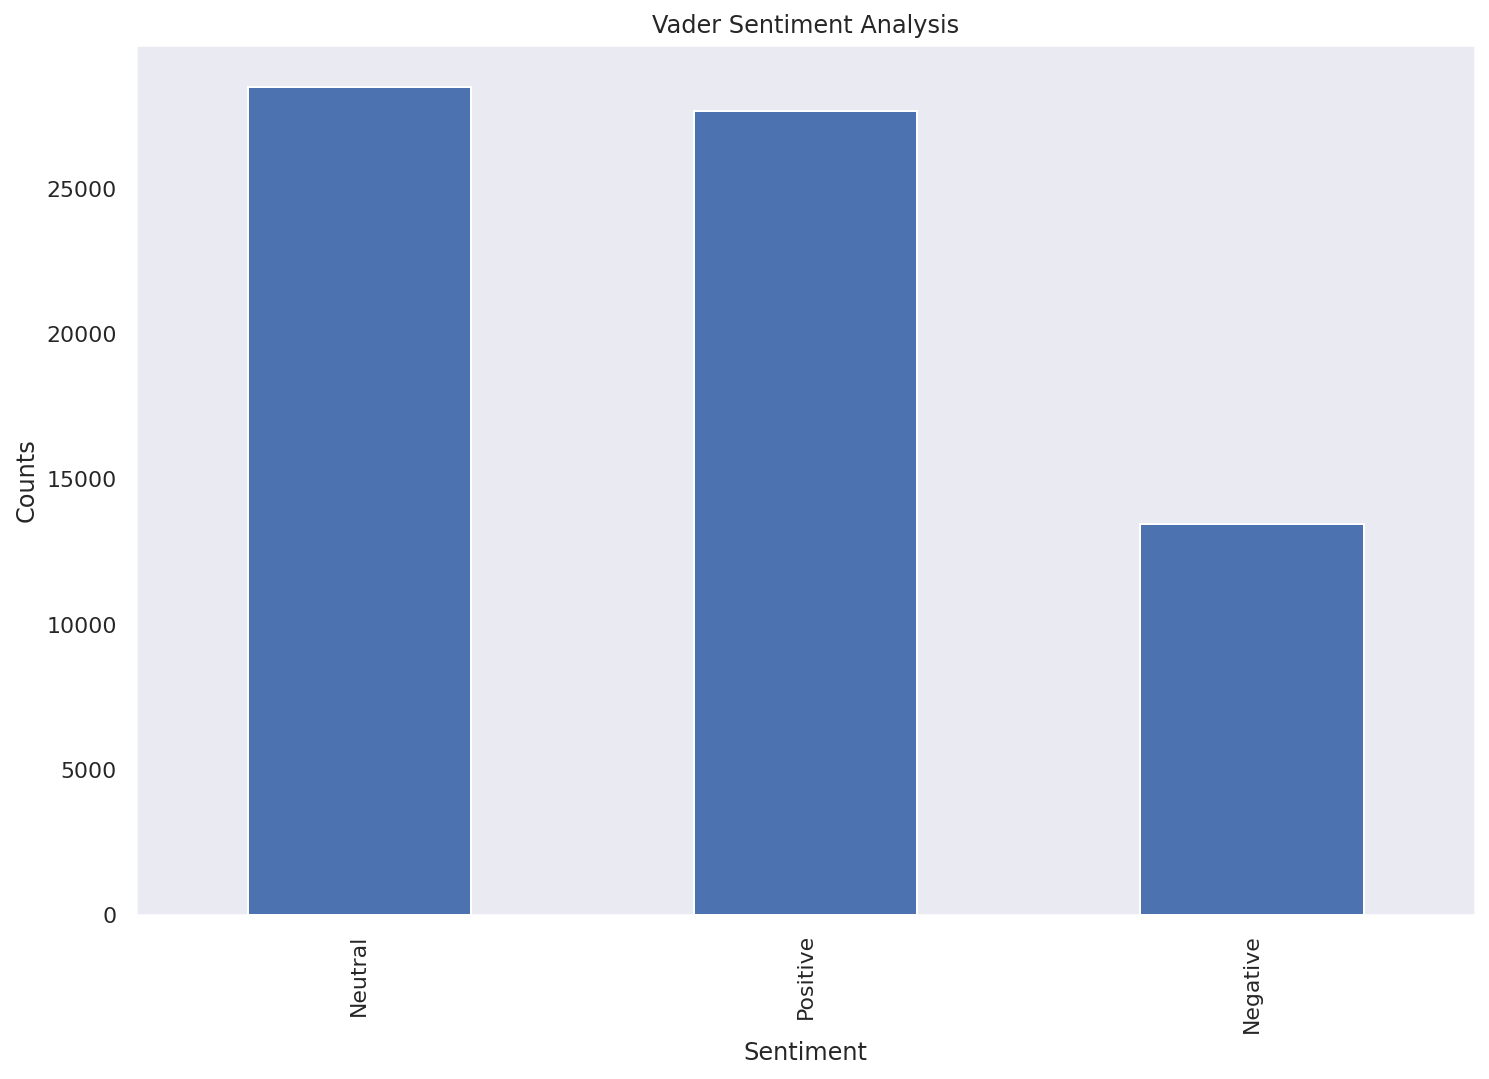

In [117]:
vader_data['Analysis'] = vader_data['Compound'].apply(val_to_text)
print(vader_data['Analysis'].value_counts())

plt.title('Vader Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
vader_data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# BERT

In [118]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU: {}'.format(device_name))
else:
    raise SystemError('GPU not found')

Found GPU: /device:GPU:0


In [34]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [35]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
color_style = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(color_style))

In [36]:
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [37]:
class_names=['Negative', 'Neutral', 'Positive']

In [38]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [39]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [44]:
token_length = []

for txt in tweets_df.text_cleaned:
  tokens = tokenizer.encode(txt, max_length=512,truncation=True)
  token_length.append(len(tokens))

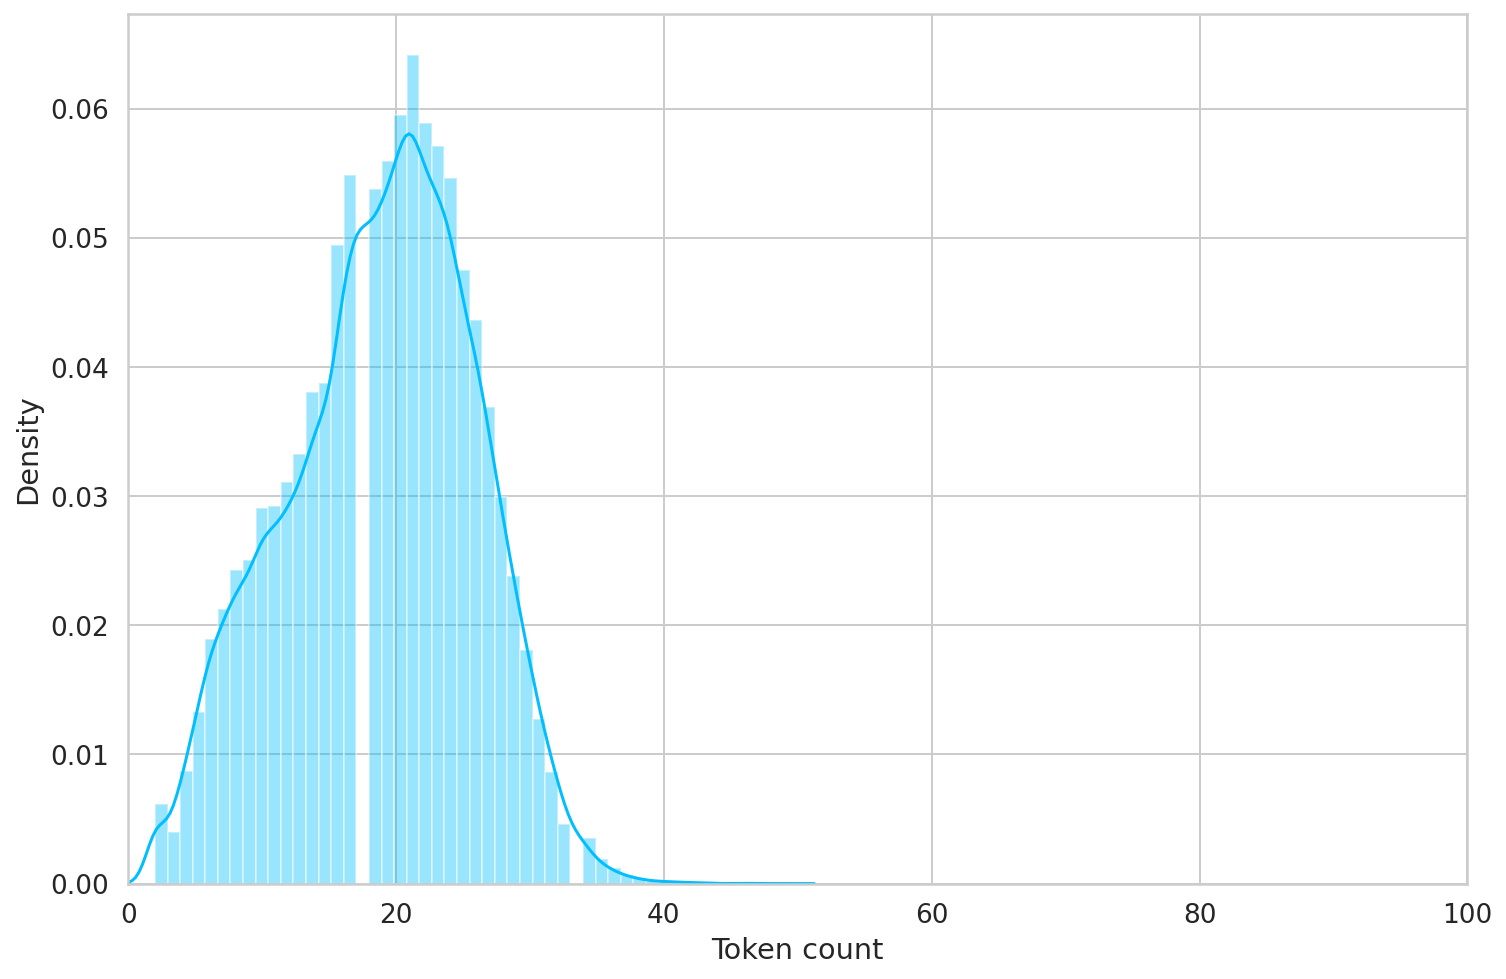

In [45]:
sns.distplot(token_length)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [53]:
tweets_df = tweets_df.reset_index(drop=True)

In [55]:
tweets_df['target'] = vader_data['target']
df_train, df_test = train_test_split(tweets_df,test_size=0.2,random_state=RANDOM_SEED,shuffle=True,stratify=tweets_df.target)
df_eval, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED,shuffle=True,stratify=df_test.target)

In [56]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_eval = df_eval.reset_index(drop=True)

In [57]:
df_train.shape, df_eval.shape, df_test.shape

((55696, 17), (6962, 17), (6963, 17))

In [72]:
class TwitterData(Dataset):

  def __init__(self, tweets, targets, tokenizer, max_len):
    self.tweets = tweets
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.tweets)
  
  def __getitem__(self, item):
    input_ids = []
    attention_masks = []   

    tweet = str(self.tweets[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      tweet,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True
    )
    input_ids.append(encoding['input_ids'])
    attention_masks.append(encoding['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.FloatTensor(input_ids)
    attention_masks = torch.FloatTensor(attention_masks)
    #print('Return stuff')
    return {
      'tweet_text': tweet,
      'input_ids': input_ids.flatten(),
      'attention_mask': attention_masks.flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [75]:
def get_data(df,tokenizer,max_len):
  return TwitterData(
        tweets = df.text_cleaned,
        targets = df.target.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
def get_data_loader(data,batch_size):
    data = TwitterData(
        tweets = df.text_cleaned,
        targets = df.target.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        data,
        batch_size=batch_size,
        num_workers=0
    )

In [76]:
BATCH_SIZE = 16
MAX_LEN = 50

data = TwitterData(tweets = df_train.text_cleaned, targets = df_train.target.to_numpy(), tokenizer=tokenizer, max_len=MAX_LEN)
train_data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=0)

data = TwitterData(tweets = df_eval.text_cleaned, targets = df_eval.target.to_numpy(), tokenizer=tokenizer, max_len=MAX_LEN)
eval_data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=0)

data = TwitterData(tweets = df_test.text_cleaned, targets = df_test.target.to_numpy(), tokenizer=tokenizer, max_len=MAX_LEN)
test_data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=0)

In [119]:
data = next(iter(train_data_loader))
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 50])
torch.Size([16, 50])
torch.Size([16])


In [64]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [81]:
class SentimentClassifier(nn.Module):

    def __init__(self,n_classes):
        super(SentimentClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size,n_classes)

    def forward(self,input_ids,attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        ) 
        output = self.drop(pooled_output)
        return self.out(output)

In [82]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [120]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

In [84]:
F.softmax(model(input_ids.to(torch.int64),attention_mask.to(torch.int64)),dim=1)

tensor([[0.5455, 0.3256, 0.1289],
        [0.6985, 0.1459, 0.1557],
        [0.7012, 0.1721, 0.1266],
        [0.5574, 0.2533, 0.1893],
        [0.4808, 0.3510, 0.1682],
        [0.3660, 0.4335, 0.2005],
        [0.5044, 0.3271, 0.1685],
        [0.3754, 0.4096, 0.2150],
        [0.4303, 0.3813, 0.1884],
        [0.3654, 0.3875, 0.2471],
        [0.5645, 0.2588, 0.1767],
        [0.4376, 0.3501, 0.2123],
        [0.4502, 0.3405, 0.2093],
        [0.6384, 0.2758, 0.0858],
        [0.3716, 0.3836, 0.2448],
        [0.5046, 0.3157, 0.1797]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [85]:
EPOCHS=5
optimizer = AdamW(model.parameters(),lr=2e-5,correct_bias=False)
total_no_steps = len(train_data_loader)*EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_no_steps)
loss_fn = nn.CrossEntropyLoss().to(device)

In [86]:
def run_model(model,data_loader,loss_fn,optimizer,device,scheduler,num_examples,is_eval):
    if is_eval == True:
      model = model.eval()
    else:
      model = model.train()
    losse_list=[]
    correct_predictions=0

    for d in data_loader:
      input_ids = d['input_ids'].to(torch.int64).to(device)
      attention_mask = d['attention_mask'].to(torch.int64).to(device)
      targets = d["targets"].to(device)
      outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
      )
      
      _,preds = torch.max(outputs,dim=1)
      loss = loss_fn(outputs,targets)
      correct_predictions+=preds.eq(targets.data).sum()
      losse_list.append(loss.item())

      if is_eval == False:
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(),max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / num_examples, np.mean(losse_list)

In [87]:
def eval_model(model,data_loader,loss_fn,device,num_examples):
    model = model.eval()

    losses=[]
    correct_predictions=0

    with torch.no_grad():
      for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids.to(torch.int64),
            attention_mask=attention_mask.to(torch.int64)
        )

        _,preds = torch.max(outputs,dim=1)

        loss=loss_fn(outputs,targets)

        correct_predictions += preds.eq(targets.data).sum()
        losses.append(loss.item())
 
    return  correct_predictions.double() / num_examples, np.mean(losses)

In [88]:
model.cuda
params = list(model.named_parameters())
print(f'The BERT model has {len(params)} different named parameters.\n')
print('**** Embedding Layer ****\n')

for par in params[0:5]:
    print("{:<55} {:>12}".format(par[0], str(tuple(par[1].size()))))

print('\n**** First Transformer ****\n')

for par in params[5:21]:
    print("{:<55} {:>12}".format(par[0], str(tuple(par[1].size()))))

print('\n**** Output Layer ****\n')

for par in params[-4:]:
    print("{:<55} {:>12}".format(par[0], str(tuple(par[1].size()))))

The BERT model has 201 different named parameters.

**** Embedding Layer ****

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

**** First Transformer ****

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [89]:
#!%%time

history =defaultdict(list)
best_accuracy=0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-' * 10)

    train_acc,train_loss = run_model(model,train_data_loader,loss_fn,optimizer,device,scheduler,len(train_data_loader.dataset),False)
    print(f'Train loss {train_loss} accuracy {train_acc}')

    eval_acc,eval_loss = run_model(model,eval_data_loader,loss_fn,device,scheduler,len(eval_data_loader.dataset),True)
    print(f'Eval loss {eval_loss} accuracy {eval_acc}')

    history['train_accuracy'].append(train_acc)
    history['eval_accuracy'].append(eval_acc)

    if eval_acc > best_accuracy:
        best_accuracy = eval_acc
print('Best accuracy: ', best_accuracy)

Epoch 1/5
----------
Train loss 0.3579412674567727 accuracy 0.8822716173513359
Val loss 0.2655309087707909 accuracy 0.9231542660155129

Epoch 2/5
----------
Train loss 0.20860806573456578 accuracy 0.9440713875323183
Val loss 0.29302702277552745 accuracy 0.9270324619362252

Epoch 3/5
----------
Train loss 0.15719902213520798 accuracy 0.9610564492961793
Val loss 0.3307144252886171 accuracy 0.9290433783395576

Epoch 4/5
----------
Train loss 0.11868592059593305 accuracy 0.9711469405343293
Val loss 0.37550876643538045 accuracy 0.9303361103131285

Epoch 5/5
----------
Train loss 0.08954765967200794 accuracy 0.978364694053433
Val loss 0.4043554693095732 accuracy 0.9276070094800345

Done


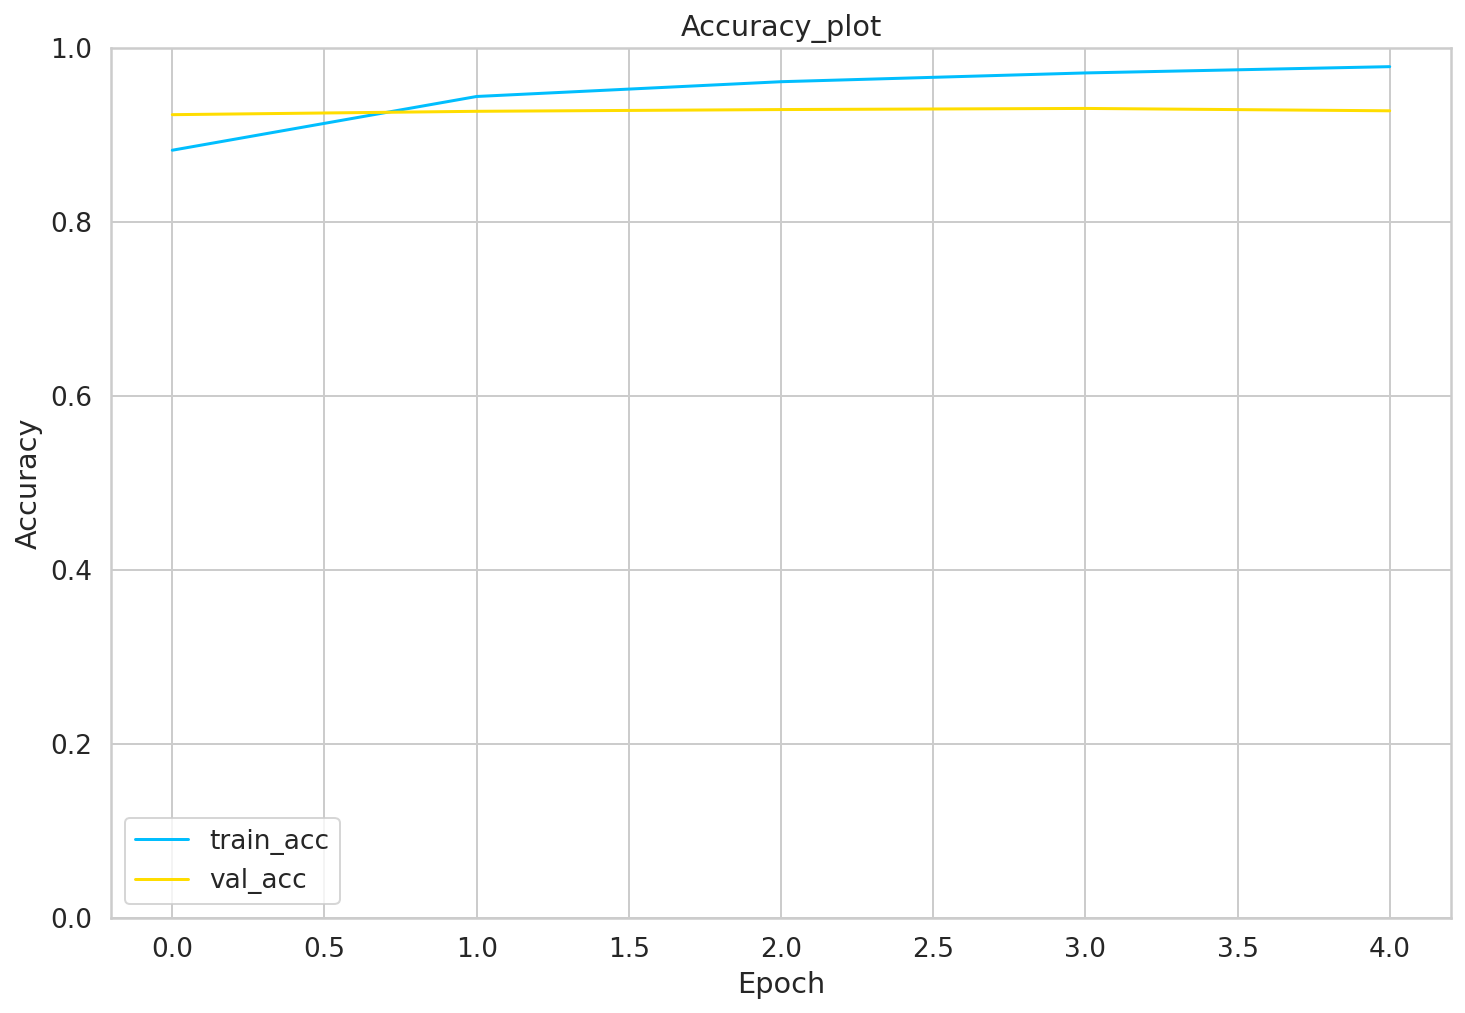

In [91]:
plt.plot(history['train_accuracy'], label='train_accuracy')
plt.plot(history['eval_accuracy'],label='eval_accuracy')
plt.title('Accuracy_plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0,1])
plt.savefig('/content/drive/My Drive/accuracy.svg')

In [92]:
test_acc,eval_loss = run_model(model,test_data_loader,loss_fn,device,schedulerlen(test_data_loader.dataset),True)
print(test_acc.item())

0.9270429412609508

In [93]:
def predict(model,data_loader):
    model = model.eval()

    tweets_texts=[]
    predictions=[]
    true_values=[]

    with torch.no_grad():
      for d in data_loader:
          input_ids = d['input_ids'].to(torch.int64).to(device)
          attention_mask = d['attention_mask'].to(torch.int64).to(device)

          outputs=model(
              input_ids=input_ids,
              attention_mask=attention_mask
          )

          _,preds = torch.max(outputs,dim=1)

          tweets_texts.extend(d['tweet_text'])
          predictions.extend(preds)
          true_values.extend(d['targets'].to(device))

      predictions = torch.stack(predictions).cpu()
      true_values = torch.stack(true_values).cpu()
      return tweets_texts,predictions

In [94]:
def val_to_text(polarity):
  if polarity == 0:
    return 'Negative'
  elif polarity == 1:
    return 'Neutral'
  elif polarity == 2:
    return 'Positive'

In [95]:
y_tweets_texts,y_pred_test=get_predictions(model,test_data_loader)

Neutral     2922
Positive    2709
Negative    1332
Name: Analysis, dtype: int64


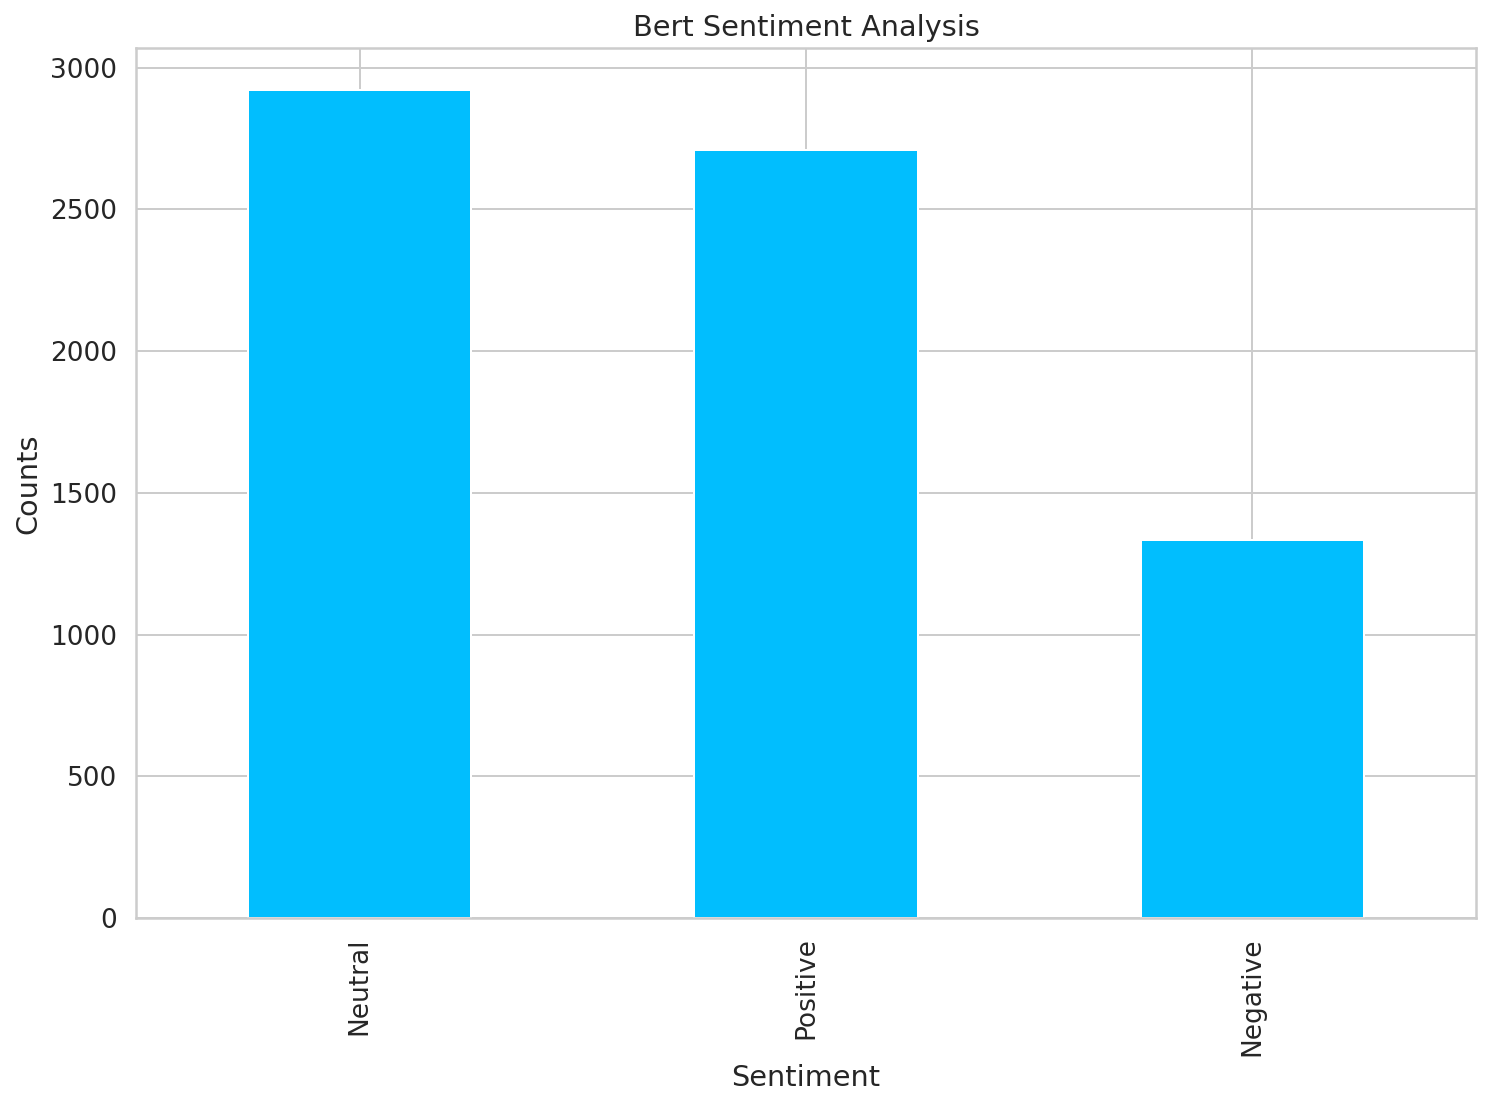

In [96]:
df_test['Analysis'] = y_pred_test
df_test['Analysis'] = df_test['Analysis'].apply(val_to_text)
print(df_test['Analysis'].value_counts())
plt.title('Bert Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_test['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [97]:
total_data_loader = get_data_loader(tweets_df, tokenizer, MAX_LEN, BATCH_SIZE)
y_tweets_texts,y_pred_total=get_predictions(model,total_data_loader)

Neutral     28985
Positive    27219
Negative    13417
Name: Analysis, dtype: int64


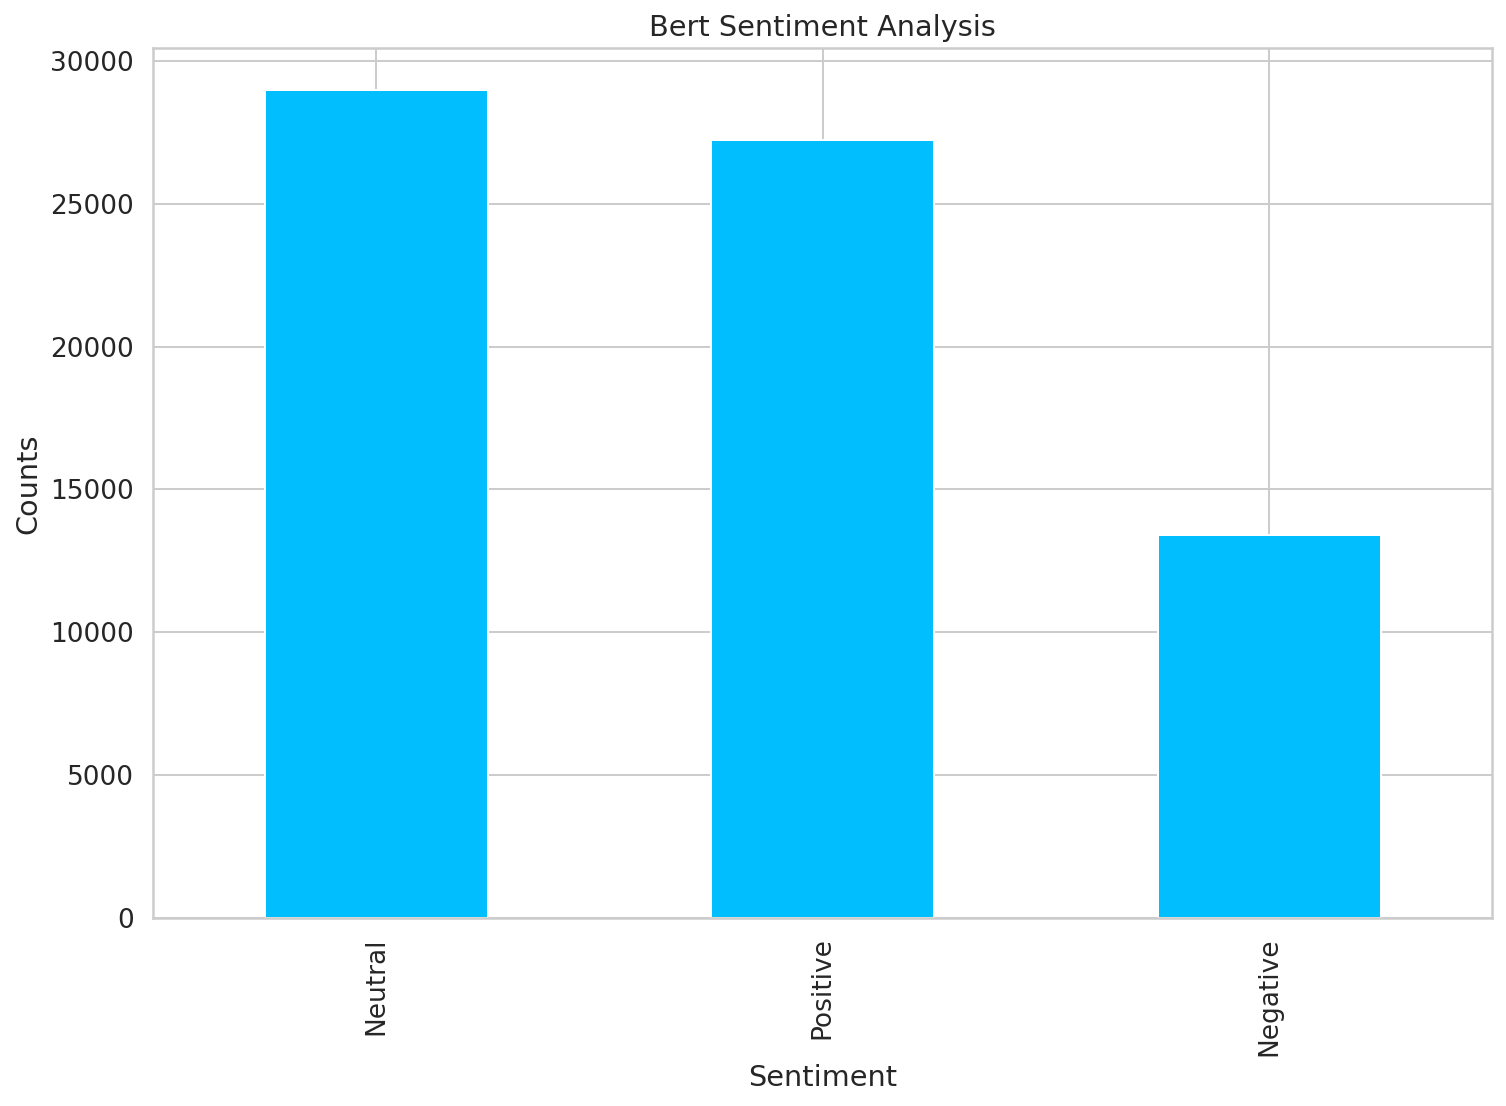

In [98]:
tweets_df['Analysis'] = y_pred_total
tweets_df['Analysis'] = tweets_df['Analysis'].apply(val_to_text)
print(tweets_df['Analysis'].value_counts())
plt.title('Bert Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [99]:
tweets_df['bert_score']=y_pred_total

In [100]:
def getVaccineTypeDF(tweets_df, vaccine_name):
    res_df = pd.DataFrame(columns=tweets_df.columns, index=tweets_df.index)
    tweets_vaccine_df = tweets_df[tweets_df['hashtags'].notna()] 
    tweets_vaccine_df = tweets_vaccine_df.reset_index(drop=True)
    for i in range(0, len(tweets_vaccine_df)):
        tag = tweets_vaccine_df.hashtags.iloc[i]
        tag = (tag).replace('[', '')
        tag = (tag).replace(']', '')
        tag = (tag).replace(' ', '')
        re = list(tag.split(','))
        for j in range(0, len(re)):
            if(re[j] == vaccine_name):
                res_df.iloc[i] = (tweets_vaccine_df.iloc[i])
    res_df = res_df.dropna()
    res_df = res_df.reset_index(drop=True)

    return res_df

In [101]:
def get_value_counts(col_name, analyzer_name, data_frame):
    count = pd.DataFrame(data_frame[col_name].value_counts())
    percentage = pd.DataFrame(data_frame[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [102]:
vacc_moderna_df = getVaccineTypeDF(tweets_df, "'Moderna'")
vacc_pfizer_df = getVaccineTypeDF(tweets_df, "'PfizerBioNTech'")
vacc_covaxin_df = getVaccineTypeDF(tweets_df, "'Covaxin'")
vacc_astrazeneca_df = getVaccineTypeDF(tweets_df, "'AstraZeneca'")
vacc_sputnikV_df = getVaccineTypeDF(tweets_df, "'SputnikV'")

In [103]:
textblob_sentiment_df_moderna = get_value_counts('Analysis','TextBlob', vacc_moderna_df)
textblob_sentiment_df_pfizer = get_value_counts('Analysis','TextBlob', vacc_pfizer_df)
textblob_sentiment_df_covaxin = get_value_counts('Analysis','TextBlob', vacc_covaxin_df)
textblob_sentiment_df_astrazeneca = get_value_counts('Analysis','TextBlob', vacc_astrazeneca_df)
textblob_sentiment_df_sputnikV = get_value_counts('Analysis','TextBlob', vacc_sputnikV_df)

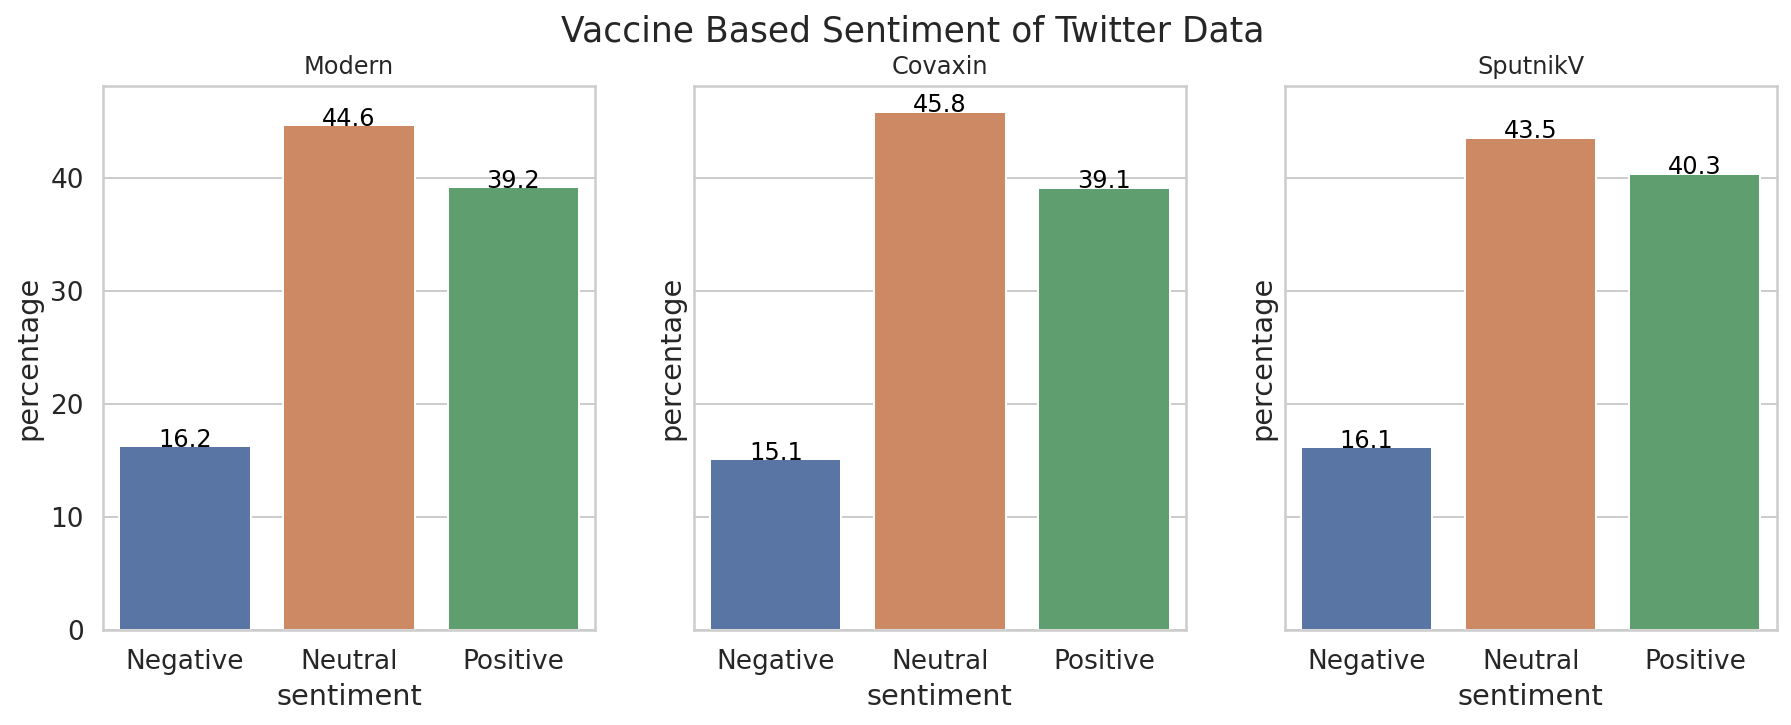

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Vaccine Based Sentiment of Twitter Data')

sns.set_theme(style="dark")
sns.barplot(ax=axes[0], x="sentiment", y="percentage", data=textblob_sentiment_df_moderna)
axes[0].set_title('Modern')
for index, row in textblob_sentiment_df_moderna.iterrows():
    axes[0].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")


sns.set_theme(style="dark")
sns.barplot(ax=axes[1], x="sentiment", y="percentage", data=textblob_sentiment_df_covaxin)
axes[1].set_title('Covaxin')
for index, row in textblob_sentiment_df_covaxin.iterrows():
    axes[1].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

sns.set_theme(style="dark")
sns.barplot(ax=axes[2], x="sentiment", y="percentage", data=textblob_sentiment_df_sputnikV)
axes[2].set_title('SputnikV')
for index, row in textblob_sentiment_df_sputnikV.iterrows():
    axes[2].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

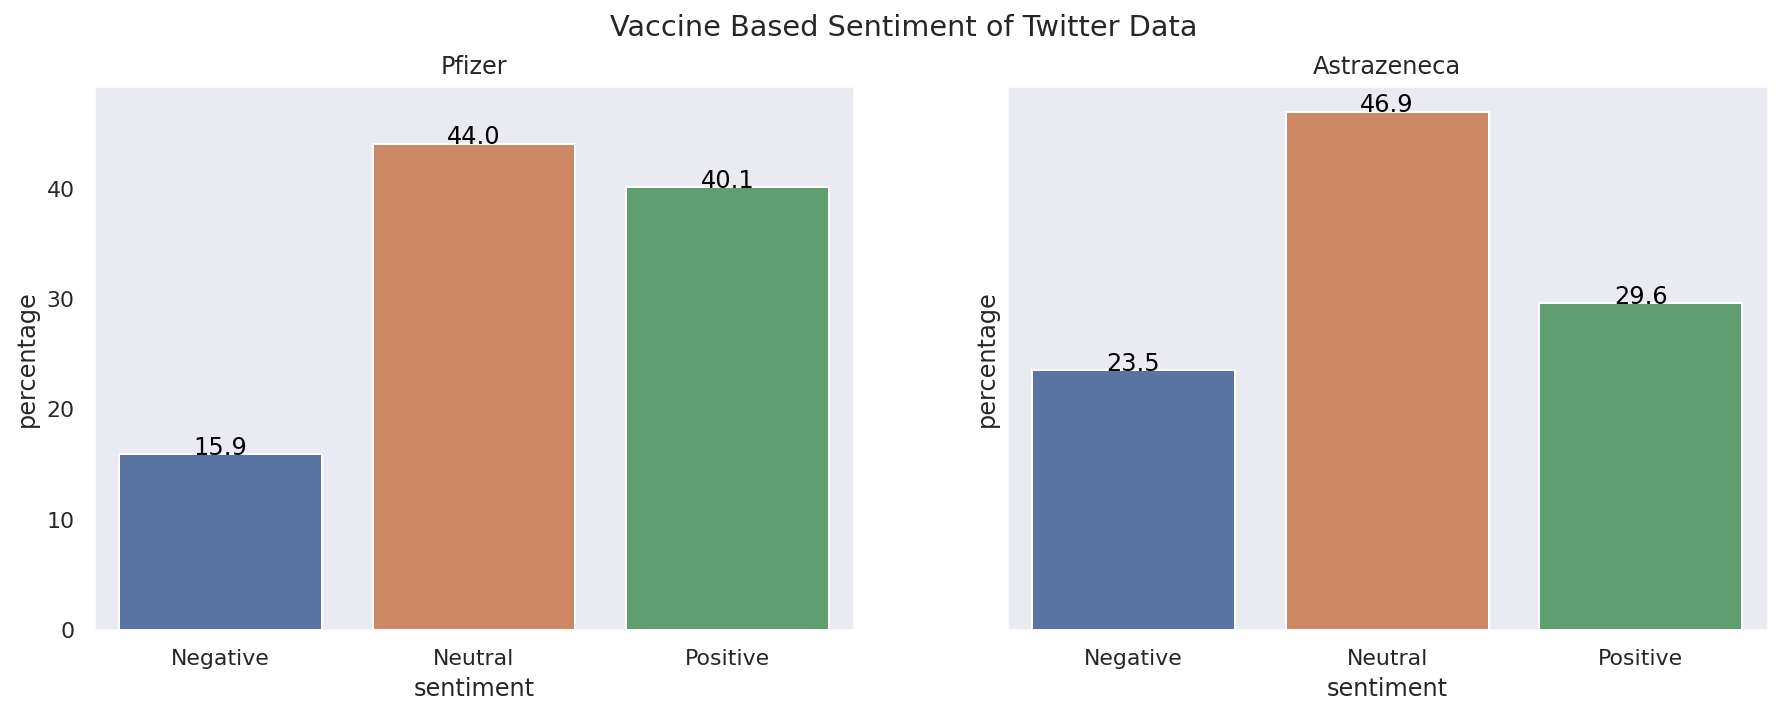

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Vaccine Based Sentiment of Twitter Data')

sns.set_theme(style="dark")
sns.barplot(ax=axes[0], x="sentiment", y="percentage", data=textblob_sentiment_df_pfizer)
axes[0].set_title('Pfizer')
for index, row in textblob_sentiment_df_pfizer.iterrows():
    axes[0].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

sns.set_theme(style="dark")
sns.barplot(ax=axes[1], x="sentiment", y="percentage", data=textblob_sentiment_df_astrazeneca)
axes[1].set_title('Astrazeneca')
for index, row in textblob_sentiment_df_astrazeneca.iterrows():
    axes[1].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

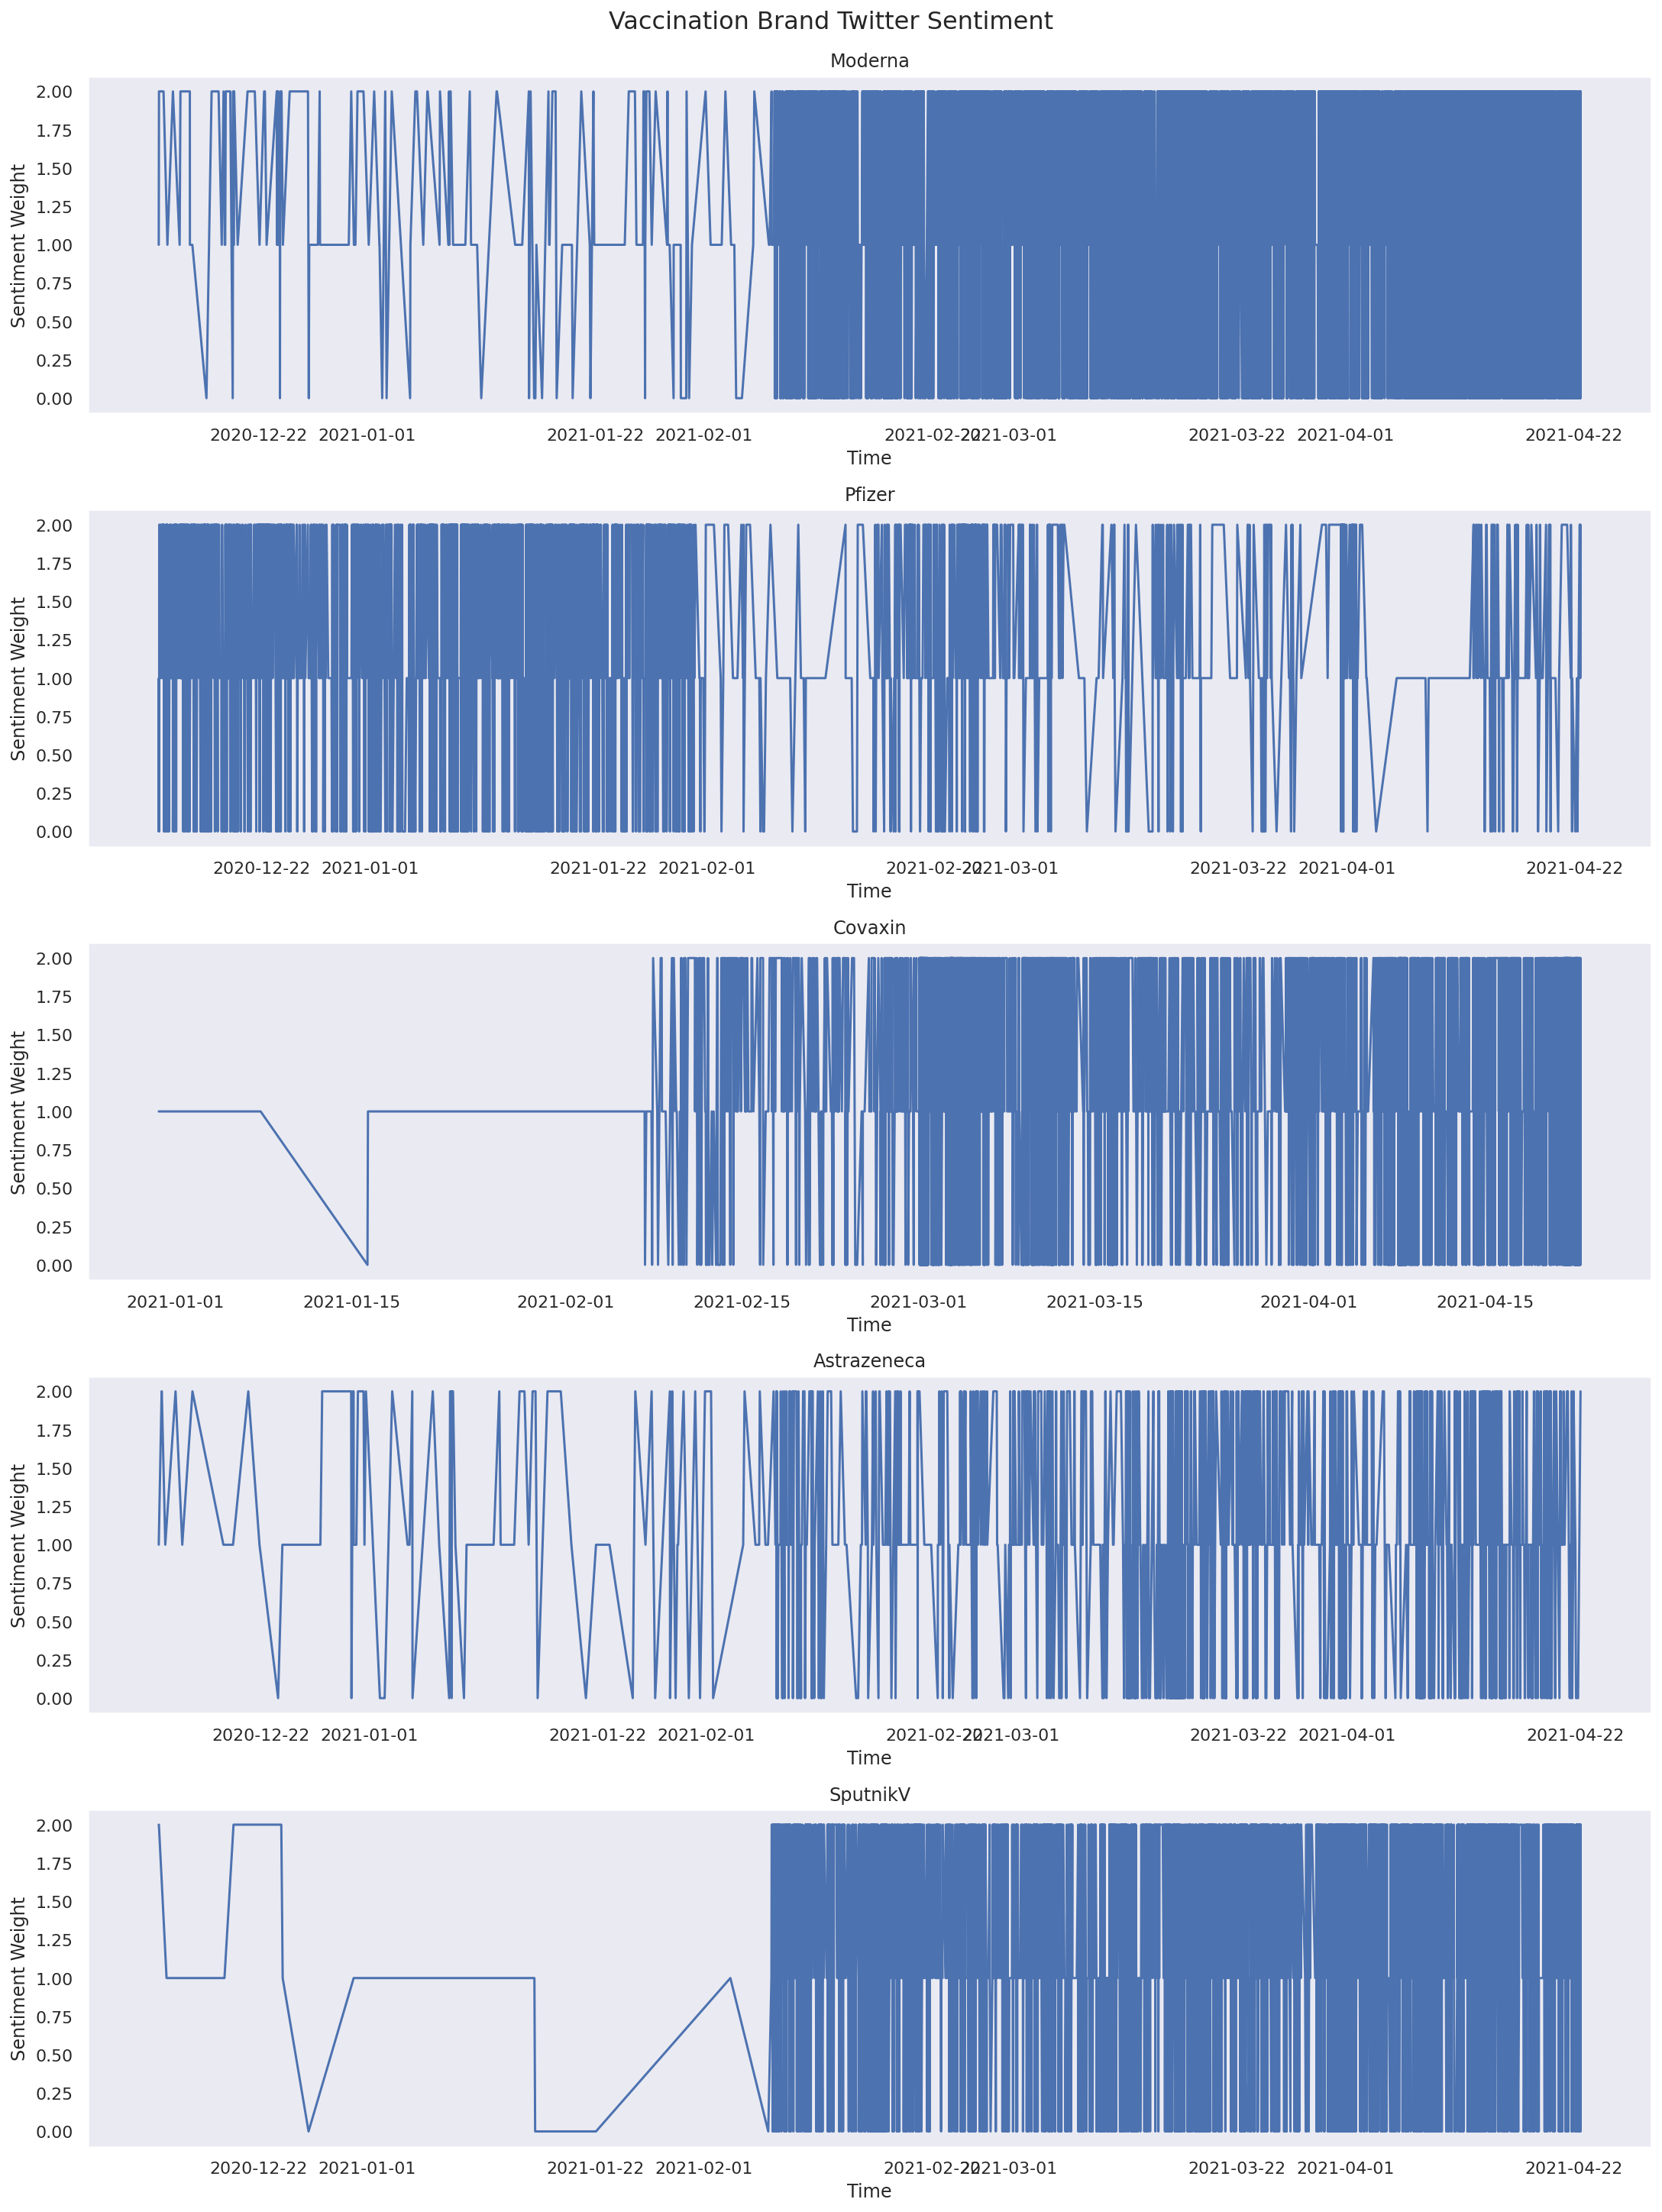

In [106]:
vacc_moderna_df_sentiment_trend = vacc_moderna_df[['date', 'bert_score', 'Analysis']]
vacc_moderna_df_sentiment_trend = vacc_moderna_df_sentiment_trend.sort_values(by='date')

vacc_pfizer_df_sentiment_trend = vacc_pfizer_df[['date', 'bert_score', 'Analysis']]
vacc_pfizer_df_sentiment_trend = vacc_pfizer_df_sentiment_trend.sort_values(by='date')

vacc_covaxin_df_sentiment_trend = vacc_covaxin_df[['date', 'bert_score', 'Analysis']]
vacc_covaxin_df_sentiment_trend = vacc_covaxin_df_sentiment_trend.sort_values(by='date')

vacc_astrazeneca_df_sentiment_trend = vacc_astrazeneca_df[['date', 'bert_score', 'Analysis']]
vacc_astrazeneca_df_sentiment_trend = vacc_astrazeneca_df_sentiment_trend.sort_values(by='date')

vacc_sputnikV_sentiment_trend = vacc_sputnikV_df[['date', 'bert_score', 'Analysis']]
vacc_sputnikV_sentiment_trend = vacc_sputnikV_sentiment_trend.sort_values(by='date')



vacc_moderna_df_sentiment_trend.date = pd.to_datetime(vacc_moderna_df_sentiment_trend['date'])
vacc_moderna_df_sentiment_trend['month_year'] = vacc_moderna_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_pfizer_df_sentiment_trend.date = pd.to_datetime(vacc_pfizer_df_sentiment_trend['date'])
vacc_pfizer_df_sentiment_trend['month_year'] = vacc_pfizer_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_covaxin_df_sentiment_trend.date = pd.to_datetime(vacc_covaxin_df_sentiment_trend['date'])
vacc_covaxin_df_sentiment_trend['month_year'] = vacc_covaxin_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_astrazeneca_df_sentiment_trend.date = pd.to_datetime(vacc_astrazeneca_df_sentiment_trend['date'])
vacc_astrazeneca_df_sentiment_trend['month_year'] = vacc_astrazeneca_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_sputnikV_sentiment_trend.date = pd.to_datetime(vacc_sputnikV_sentiment_trend['date'])
vacc_sputnikV_sentiment_trend['month_year'] = vacc_sputnikV_sentiment_trend['date'].dt.strftime('%Y-%m')


fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 20))
axs[0].plot(vacc_moderna_df_sentiment_trend.date.values,
            vacc_moderna_df_sentiment_trend['bert_score'])
axs[0].set_title('Moderna')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Sentiment Weight')
fig.suptitle('Vaccination Brand Twitter Sentiment', fontsize=16)

axs[1].plot(vacc_pfizer_df_sentiment_trend.date.values,
            vacc_pfizer_df_sentiment_trend['bert_score'])
axs[1].set_title('Pfizer')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Sentiment Weight')

axs[2].plot(vacc_covaxin_df_sentiment_trend.date.values,
            vacc_covaxin_df_sentiment_trend['bert_score'])
axs[2].set_title('Covaxin')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Sentiment Weight')

axs[3].plot(vacc_astrazeneca_df_sentiment_trend.date.values,
            vacc_astrazeneca_df_sentiment_trend['bert_score'])
axs[3].set_title('Astrazeneca')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Sentiment Weight')

axs[4].plot(vacc_sputnikV_sentiment_trend.date.values,
            vacc_sputnikV_sentiment_trend['bert_score'])
axs[4].set_title('SputnikV')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('Sentiment Weight')
plt.show()

In [107]:
def _getMonthWiseCounts(trend_df):
    year_month_list = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04']
    count_df = pd.DataFrame(columns=['Analysis', 'month', 'count'])
    for year_month in year_month_list:
        trend_df_pos = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_pos = trend_df_pos.loc[trend_df['Analysis']  == 'Positive'] 
        count_df = count_df.append({'Analysis': 'Positive', 'month': year_month,
                                   'count': len(trend_df_pos)}, ignore_index=True)

        trend_df_neg = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_neg = trend_df_neg.loc[trend_df['Analysis']  == 'Negative']
        count_df = count_df.append({'Analysis': 'Negative', 'month': year_month,
                                   'count': len(trend_df_neg)}, ignore_index=True)

        trend_df_neu = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_neu = trend_df_neu.loc[trend_df['Analysis']  == 'Neutral']
        count_df = count_df.append({'Analysis': 'Neutral', 'month': year_month,
                                   'count': len(trend_df_neu)}, ignore_index=True)
    
    return count_df

In [108]:
moderna_count_df = _getMonthWiseCounts(vacc_moderna_df_sentiment_trend)
pfizer_count_df = _getMonthWiseCounts(vacc_pfizer_df_sentiment_trend)
covaxin_count_df = _getMonthWiseCounts(vacc_covaxin_df_sentiment_trend)
astrazeneca_count_df = _getMonthWiseCounts(vacc_astrazeneca_df_sentiment_trend)
sputnikV_count_df = _getMonthWiseCounts(vacc_sputnikV_sentiment_trend)

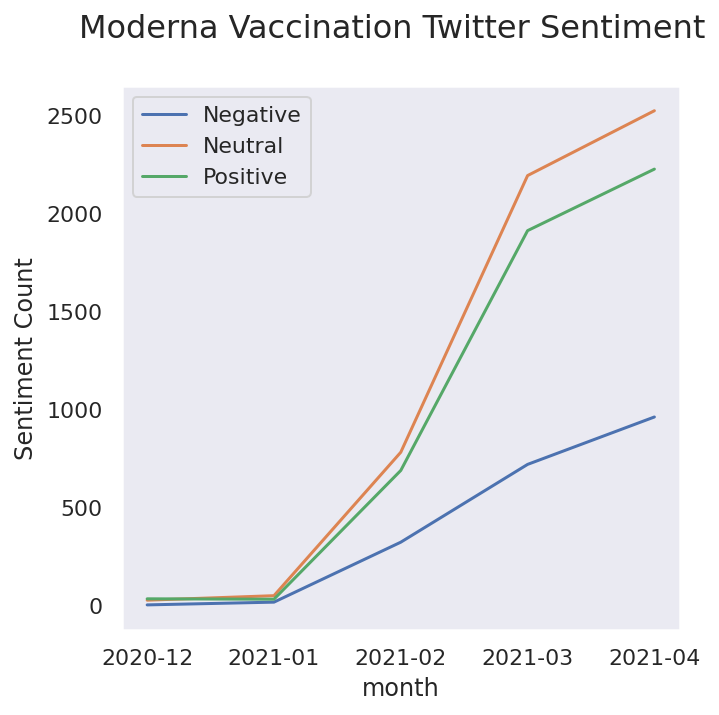

In [109]:

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Moderna Vaccination Twitter Sentiment', fontsize=16)
for label, grp in moderna_count_df.groupby('Analysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

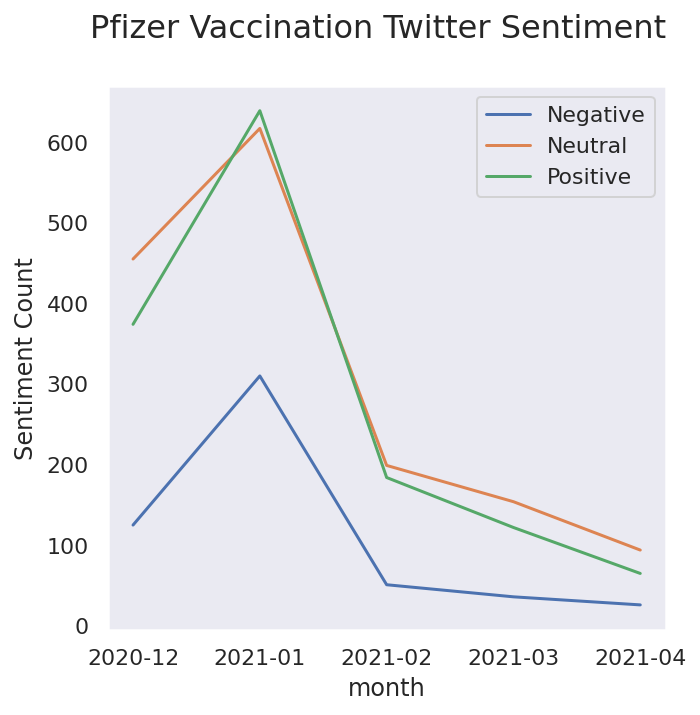

In [110]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Pfizer Vaccination Twitter Sentiment', fontsize=16)
for label, grp in pfizer_count_df.groupby('Analysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

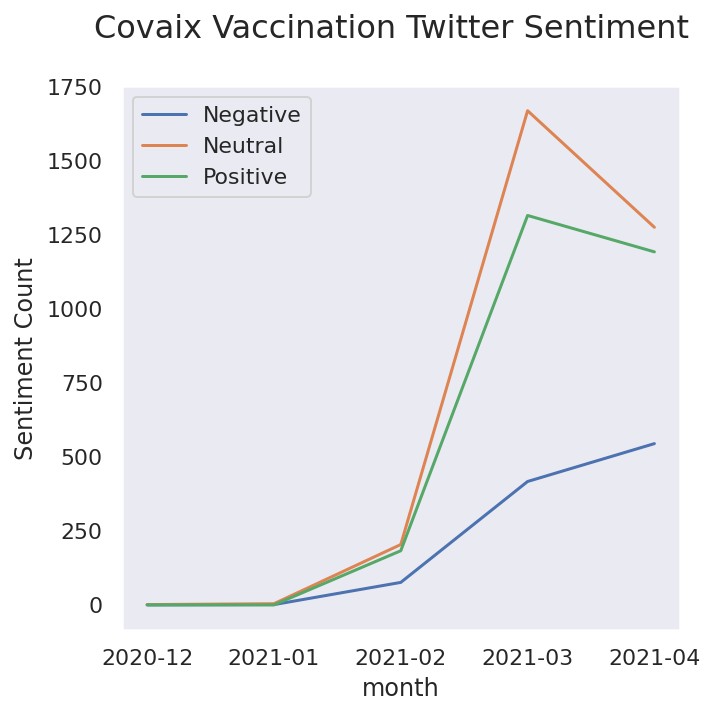

In [111]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Covaix Vaccination Twitter Sentiment', fontsize=16)
for label, grp in covaxin_count_df.groupby('Analysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

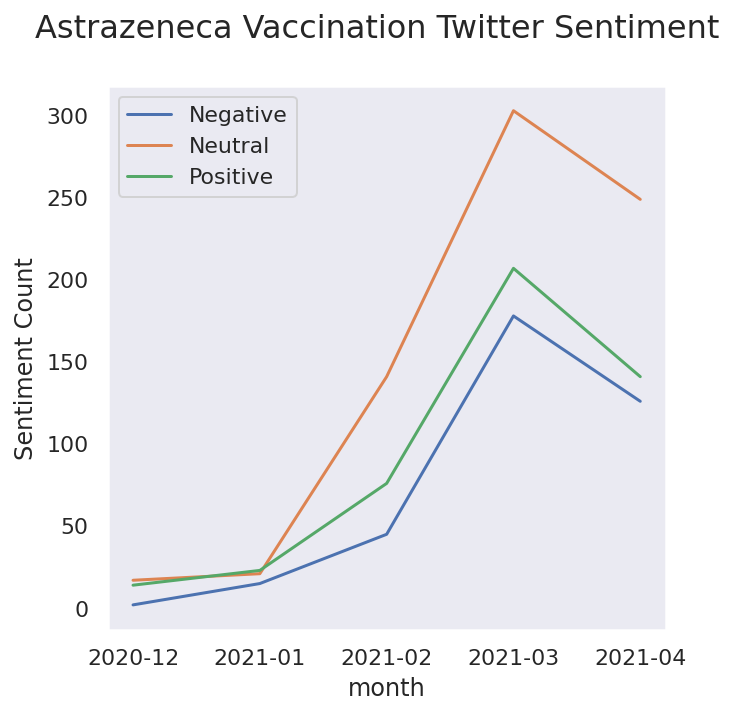

In [112]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Astrazeneca Vaccination Twitter Sentiment', fontsize=16)
for label, grp in astrazeneca_count_df.groupby('Analysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

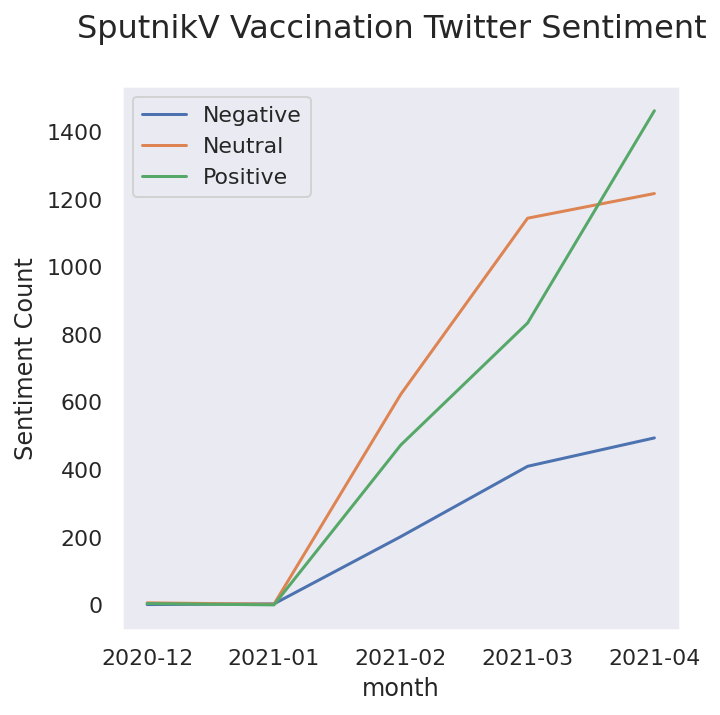

In [113]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('SputnikV Vaccination Twitter Sentiment', fontsize=16)
for label, grp in sputnikV_count_df.groupby('Analysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

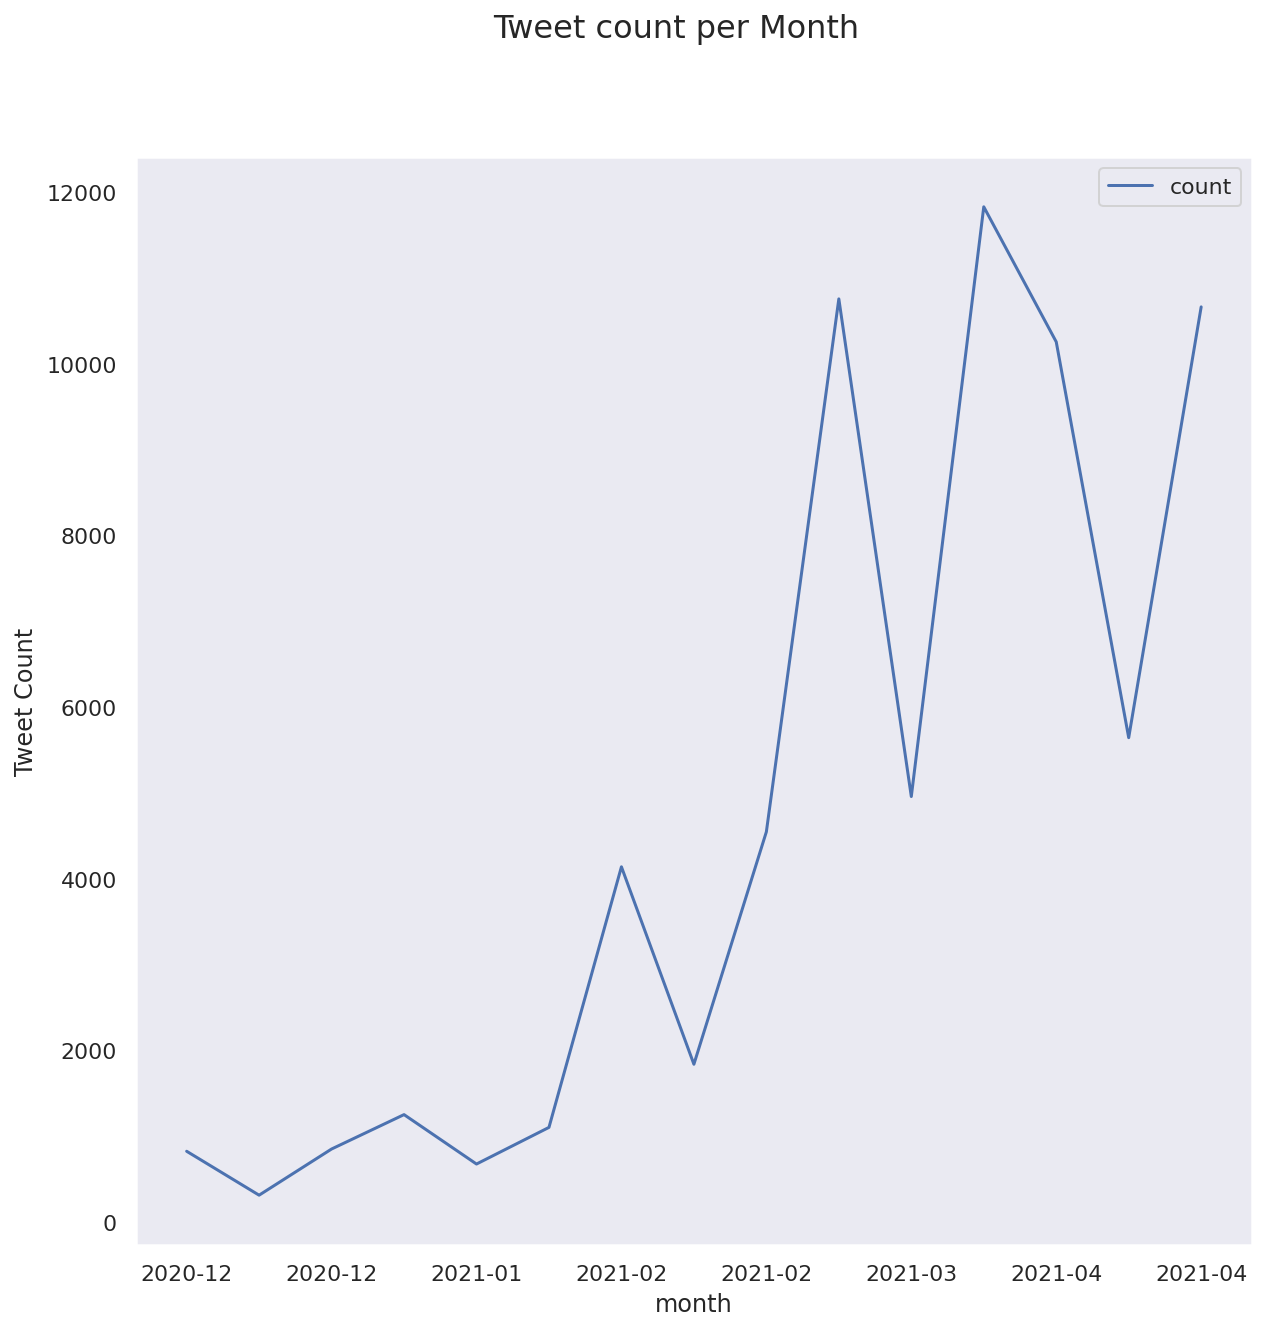

In [133]:
test = tweets_df
test.date = pd.to_datetime(test['date'])
test['month_year'] = test['date'].dt.strftime('%Y-%m')
get_month_count = _getMonthWiseCounts(test)
get_month_count['dummy']=0

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Month')
ax.set_ylabel('Tweet Count')
fig.suptitle('Tweet count per Month', fontsize=16)
for label, grp in get_month_count.groupby('dummy'):
  grp.plot(x = 'month', y = 'count',ax = ax)